# Homework 1: Energy Forecast of North Tower Building

# Initial Setup

## Working environment setup

In [1]:
import pandas as pd
import numpy as np
import math
import datetime
from sklearn import linear_model
from matplotlib import pyplot as plt
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs

## Importing Data

In [2]:
# Import data from 2017 and 2018
nt_2017_raw = pd.read_csv(r'C:\Users\Christian Utama\Python\Energy Services\HW1\IST_North_Tower_2017_Ene_Cons_errors.csv')
nt_2018_raw = pd.read_csv(r'C:\Users\Christian Utama\Python\Energy Services\HW1\IST_North_Tower_2018_Ene_Cons.csv')

In [3]:
# Run inital checks on the data
nt_2017_raw.shape

(8752, 5)

In [4]:
nt_2018_raw.shape

(8760, 5)

Different number of rows between the two datasets indicates the presence of missing rows in the 2017 data

In [5]:
nt_2017_raw.dtypes

Date_start     object
Date_end       object
Duration      float64
Total_Ah      float64
Power_kW      float64
dtype: object

In [6]:
nt_2018_raw.dtypes

Date_start     object
Date_end       object
Duration      float64
Total_Ah      float64
Power_kW      float64
dtype: object

In [7]:
nt_2017_raw.head()

,Date_start,Date_end,Duration,Total_Ah,Power_kW
0,1/1/2017 0:00,1/1/2017 1:00,NaN,196.780,42.996430
1,1/1/2017 1:00,1/1/2017 2:00,NaN,195.661,42.751928
2,1/1/2017 2:00,1/1/2017 3:00,NaN,196.164,42.861834
3,1/1/2017 3:00,1/1/2017 4:00,NaN,193.674,42.317769
4,1/1/2017 4:00,1/1/2017 5:00,NaN,195.210,42.653385


In [8]:
nt_2017_raw.tail()

,Date_start,Date_end,Duration,Total_Ah,Power_kW
8747,31-12-2017 19:00,31-12-2017 20:00,NaN,199.138,43.511653
8748,31-12-2017 20:00,31-12-2017 21:00,NaN,199.785,43.653022
8749,31-12-2017 21:00,31-12-2017 22:00,NaN,189.096,41.317476
8750,31-12-2017 22:00,31-12-2017 23:00,NaN,188.467,41.180039
8751,31-12-2017 23:00,1/1/2018 0:00,NaN,188.960,41.287760


Non-uniform formatting observed for 'Date_start' and 'Date_end'

In [9]:
nt_2018_raw.head()

,Date_start,Date_end,Duration,Total_Ah,Power_kW
0,1/1/2018 0:00,1/1/2018 1:00,NaN,186.244,40.694314
1,1/1/2018 1:00,1/1/2018 2:00,NaN,187.510,40.970935
2,1/1/2018 2:00,1/1/2018 3:00,NaN,188.115,41.103127
3,1/1/2018 3:00,1/1/2018 4:00,NaN,187.799,41.034081
4,1/1/2018 4:00,1/1/2018 5:00,NaN,185.627,40.559500


In [10]:
nt_2018_raw.tail()

,Date_start,Date_end,Duration,Total_Ah,Power_kW
8755,31-12-2018 19:00,31-12-2018 20:00,NaN,320.971,70.132164
8756,31-12-2018 20:00,31-12-2018 21:00,NaN,268.474,58.661569
8757,31-12-2018 21:00,31-12-2018 22:00,NaN,200.905,43.897742
8758,31-12-2018 22:00,31-12-2018 23:00,NaN,191.343,41.808446
8759,31-12-2018 23:00,1/1/2019 0:00,NaN,184.138,40.234153


Non-uniform formatting observed for 'Date_start' and 'Date_end'

# Data Cleaning and Processing

## Formatting and Reshaping

In [11]:
# Uniformize the format of the data contained in 'Date_start' and 'Date_end'
nt_2017_raw.Date_start = nt_2017_raw.Date_start.str.replace("-", "/")
nt_2017_raw.Date_end = nt_2017_raw.Date_end.str.replace("-", "/")
nt_2018_raw.Date_start = nt_2018_raw.Date_start.str.replace("-", "/")
nt_2018_raw.Date_end = nt_2018_raw.Date_end.str.replace("-", "/")

In [12]:
# Apply pd.to_datetime to 'Date_start' and 'Date_end' to convert it into a true date type 
nt_2017_raw.Date_start = pd.to_datetime(nt_2017_raw.Date_start, format='%d/%m/%Y %H:%M')
nt_2017_raw.Date_end = pd.to_datetime(nt_2017_raw.Date_end, format='%d/%m/%Y %H:%M')
nt_2017_raw.dtypes
#print(nt_2017_raw.Date_start[0].year, nt_2017_raw.Date_start[0].month, nt_2017_raw.Date_start[0].day)
#print(nt_2017_raw.Date_end[0].hour, nt_2017_raw.Date_start[0].minute)

Date_start    datetime64[ns]
Date_end      datetime64[ns]
Duration             float64
Total_Ah             float64
Power_kW             float64
dtype: object

In [13]:
nt_2018_raw.Date_start = pd.to_datetime(nt_2018_raw.Date_start, format='%d/%m/%Y %H:%M')
nt_2018_raw.Date_end = pd.to_datetime(nt_2018_raw.Date_end, format='%d/%m/%Y %H:%M')
nt_2017_raw.dtypes
#print(nt_2018_raw.Date_start[0].year, nt_2018_raw.Date_start[0].month, nt_2018_raw.Date_start[0].day)
#print(nt_2018_raw.Date_end[0].hour, nt_2018_raw.Date_start[0].minute)

Date_start    datetime64[ns]
Date_end      datetime64[ns]
Duration             float64
Total_Ah             float64
Power_kW             float64
dtype: object

In [14]:
# Drop 'Duration' column since the information is redundant (every row provides hourly values)
nt_2017_reshaped = nt_2017_raw.drop(columns = ['Duration'])
nt_2018_reshaped = nt_2018_raw.drop(columns = ['Duration'])

In [15]:
nt_2017_reshaped.head()

,Date_start,Date_end,Total_Ah,Power_kW
0,2017-01-01 00:00:00,2017-01-01 01:00:00,196.780,42.996430
1,2017-01-01 01:00:00,2017-01-01 02:00:00,195.661,42.751928
2,2017-01-01 02:00:00,2017-01-01 03:00:00,196.164,42.861834
3,2017-01-01 03:00:00,2017-01-01 04:00:00,193.674,42.317769
4,2017-01-01 04:00:00,2017-01-01 05:00:00,195.210,42.653385


In [16]:
nt_2018_reshaped.head()

,Date_start,Date_end,Total_Ah,Power_kW
0,2018-01-01 00:00:00,2018-01-01 01:00:00,186.244,40.694314
1,2018-01-01 01:00:00,2018-01-01 02:00:00,187.510,40.970935
2,2018-01-01 02:00:00,2018-01-01 03:00:00,188.115,41.103127
3,2018-01-01 03:00:00,2018-01-01 04:00:00,187.799,41.034081
4,2018-01-01 04:00:00,2018-01-01 05:00:00,185.627,40.559500


## Identifying and Handling Missing Values

### Completing Missing Rows for 2017 Data 

In [17]:
# Check the location of missing values 
nt_2017_reshaped[nt_2017_reshaped.isnull().any(axis = 'columns')]

,Date_start,Date_end,Total_Ah,Power_kW
37,2017-01-02 13:00:00,2017-01-02 14:00:00,860.284,NaN
38,2017-01-02 14:00:00,2017-01-02 15:00:00,910.009,NaN
39,2017-01-02 15:00:00,2017-01-02 16:00:00,914.100,NaN
40,2017-01-02 16:00:00,2017-01-02 17:00:00,932.079,NaN
84,NaT,NaT,NaN,NaN
85,NaT,NaT,NaN,NaN
86,NaT,NaT,NaN,NaN
87,NaT,NaT,NaN,NaN
88,NaT,NaT,NaN,NaN
121,2017-01-06 01:00:00,2017-01-06 02:00:00,195.393,NaN


In [18]:
# Fill out the missing values for 'Date_start' and 'Date_end' in rows 84 to 88 of nt_2017_reshaped
for i in range(84,89):
    nt_2017_reshaped.loc[i, 'Date_start'] = nt_2017_reshaped.Date_start[i-1] + timedelta(hours = 1)
    nt_2017_reshaped.loc[i, 'Date_end'] = nt_2017_reshaped.Date_end[i-1] + timedelta(hours = 1)

In [19]:
nt_2017_reshaped.loc[80:90]

,Date_start,Date_end,Total_Ah,Power_kW
80,2017-01-04 08:00:00,2017-01-04 09:00:00,502.999,109.905282
81,2017-01-04 09:00:00,2017-01-04 10:00:00,579.373,126.593000
82,2017-01-04 10:00:00,2017-01-04 11:00:00,1018.696,222.585076
83,2017-01-04 11:00:00,2017-01-04 12:00:00,901.025,196.873963
84,2017-01-04 12:00:00,2017-01-04 13:00:00,NaN,NaN
85,2017-01-04 13:00:00,2017-01-04 14:00:00,NaN,NaN
86,2017-01-04 14:00:00,2017-01-04 15:00:00,NaN,NaN
87,2017-01-04 15:00:00,2017-01-04 16:00:00,NaN,NaN
88,2017-01-04 16:00:00,2017-01-04 17:00:00,NaN,NaN
89,2017-01-04 17:00:00,2017-01-04 18:00:00,704.286,153.886491


In [20]:
# Identify the location of the missing rows in nt_2017_reshaped using timedelta, since the difference between each row in the 
# two datasets should be equal to 1 year.
nt_2017_reshaped.loc[(nt_2018_reshaped.Date_start - nt_2017_reshaped.Date_start) != timedelta(days=365),:].head(10)

,Date_start,Date_end,Total_Ah,Power_kW
159,2017-01-07 23:00:00,2017-01-08 00:00:00,209.265,45.724403
160,2017-01-08 00:00:00,2017-01-08 01:00:00,205.324,44.863294
161,2017-01-08 01:00:00,2017-01-08 02:00:00,199.536,43.598616
162,2017-01-08 02:00:00,2017-01-08 03:00:00,200.315,43.768828
163,2017-01-08 03:00:00,2017-01-08 04:00:00,198.815,43.441078
164,2017-01-08 04:00:00,2017-01-08 05:00:00,198.102,43.285287
165,2017-01-08 05:00:00,2017-01-08 06:00:00,197.040,43.053240
166,2017-01-08 06:00:00,2017-01-08 07:00:00,197.239,43.096722
167,2017-01-08 07:00:00,2017-01-08 08:00:00,216.518,47.309183
168,2017-01-08 08:00:00,2017-01-08 09:00:00,216.243,47.249096


It could be observed that from row 159 onwards, the time diference between the two datasets is shifted. Therefore, looking around the 159th row should give us an insight about the problem.

In [21]:
nt_2017_reshaped.loc[155:162]

,Date_start,Date_end,Total_Ah,Power_kW
155,2017-01-07 11:00:00,2017-01-07 12:00:00,225.096,49.183476
156,2017-01-07 12:00:00,2017-01-07 13:00:00,225.108,49.186098
157,2017-01-07 13:00:00,2017-01-07 14:00:00,225.067,49.177140
158,2017-01-07 14:00:00,2017-01-07 15:00:00,232.333,50.764761
159,2017-01-07 23:00:00,2017-01-08 00:00:00,209.265,45.724403
160,2017-01-08 00:00:00,2017-01-08 01:00:00,205.324,44.863294
161,2017-01-08 01:00:00,2017-01-08 02:00:00,199.536,43.598616
162,2017-01-08 02:00:00,2017-01-08 03:00:00,200.315,43.768828


Between rows 158 and 159, there are 8 missing rows (15:00 to 23:00). We should create a new DataFrame which will allow us to create placeholders for the missing rows.

In [22]:
nt_2017_complete_rows = nt_2017_reshaped.loc[0:158]

In [23]:
# Create placeholders for the missing rows by entering the missing 'Date_start' and 'Date_end' values while setting the other
# two columns to None
missing_index = 158
for i in range(0,8):
    date_start = nt_2017_complete_rows.Date_start[missing_index] + timedelta(hours=1)
    date_end = nt_2017_complete_rows.Date_end[missing_index] + timedelta(hours=1)
    nt_2017_complete_rows = nt_2017_complete_rows.append(pd.DataFrame([[date_start, date_end, None, None]], 
                                              columns = nt_2017_complete_rows.columns), ignore_index=True)
    missing_index += 1
nt_2017_complete_rows.tail(10)

,Date_start,Date_end,Total_Ah,Power_kW
157,2017-01-07 13:00:00,2017-01-07 14:00:00,225.067,49.177140
158,2017-01-07 14:00:00,2017-01-07 15:00:00,232.333,50.764761
159,2017-01-07 15:00:00,2017-01-07 16:00:00,NaN,NaN
160,2017-01-07 16:00:00,2017-01-07 17:00:00,NaN,NaN
161,2017-01-07 17:00:00,2017-01-07 18:00:00,NaN,NaN
162,2017-01-07 18:00:00,2017-01-07 19:00:00,NaN,NaN
163,2017-01-07 19:00:00,2017-01-07 20:00:00,NaN,NaN
164,2017-01-07 20:00:00,2017-01-07 21:00:00,NaN,NaN
165,2017-01-07 21:00:00,2017-01-07 22:00:00,NaN,NaN
166,2017-01-07 22:00:00,2017-01-07 23:00:00,NaN,NaN


In [24]:
# Rejoin the remaining rows from the initial DataFrame and check whether the number of rows is now correct
nt_2017_complete_rows = nt_2017_complete_rows.append(nt_2017_reshaped.loc[159:], ignore_index=True)
nt_2017_complete_rows.shape

(8760, 4)

### Data imputation

In [25]:
# Check where the missing values are located in both datasets
nt_2017_complete_rows[nt_2017_complete_rows.isnull().any(axis = 'columns')]

,Date_start,Date_end,Total_Ah,Power_kW
37,2017-01-02 13:00:00,2017-01-02 14:00:00,860.284,NaN
38,2017-01-02 14:00:00,2017-01-02 15:00:00,910.009,NaN
39,2017-01-02 15:00:00,2017-01-02 16:00:00,914.100,NaN
40,2017-01-02 16:00:00,2017-01-02 17:00:00,932.079,NaN
84,2017-01-04 12:00:00,2017-01-04 13:00:00,NaN,NaN
85,2017-01-04 13:00:00,2017-01-04 14:00:00,NaN,NaN
86,2017-01-04 14:00:00,2017-01-04 15:00:00,NaN,NaN
87,2017-01-04 15:00:00,2017-01-04 16:00:00,NaN,NaN
88,2017-01-04 16:00:00,2017-01-04 17:00:00,NaN,NaN
121,2017-01-06 01:00:00,2017-01-06 02:00:00,195.393,NaN


From the 2017 data, it could be observed that there are 2 cases of missing values:
* 'Total_Ah' is present while 'Power_kW' is missing and vice-versa
* Both are missing

In the former case, we should develop a linear model between the two variables to allow prediction of the missing variable. A linear model makes sense here because it is obvious that the relationship between the variables is linear. Ah is a unit of electric charge which indicates the amount of current passing through during one hour. Meanwhile, kW is a measure of energy (in this case electricity) flow over one second. Multiplying 'Power_kW' by the duration of each data point (1 hour) would result in the amount of energy 'consumed' during one hour in kWh and dividing it by the voltage of the system in kV would ultimately lead us to the hourly current flow in Ah. Since the voltage should always be constant, the previous equation confirms the linear relationship between the two variables.

For the latter case, the solution is not as obvious and there are multiple techniques which could be applied, for instance linear interpolation, filling in with the mean, etc.

In [26]:
# Confirm the linear correlation between 'Total_Ah' and 'Power_kW'
nt_2017_complete_rows.corr()

,Total_Ah,Power_kW
Total_Ah,1.0,1.0
Power_kW,1.0,1.0


In [27]:
nt_2018_reshaped[nt_2018_reshaped.isnull().any(axis = 'columns')]

,Date_start,Date_end,Total_Ah,Power_kW
1115,2018-02-16 11:00:00,2018-02-16 12:00:00,NaN,0.0
1116,2018-02-16 12:00:00,2018-02-16 13:00:00,NaN,0.0
1117,2018-02-16 13:00:00,2018-02-16 14:00:00,NaN,0.0
1118,2018-02-16 14:00:00,2018-02-16 15:00:00,NaN,0.0
1119,2018-02-16 15:00:00,2018-02-16 16:00:00,NaN,0.0
...,...,...,...,...
1186,2018-02-19 10:00:00,2018-02-19 11:00:00,NaN,0.0
1187,2018-02-19 11:00:00,2018-02-19 12:00:00,NaN,0.0
1188,2018-02-19 12:00:00,2018-02-19 13:00:00,NaN,0.0
1189,2018-02-19 13:00:00,2018-02-19 14:00:00,NaN,0.0


The missing values in the 2018 dataset could be seen as more systematic. It could be observed that the missing values are from the 16th to 19th of February, which gives rise to the hypothesis
that the monitoring equipment was either broken or under maintenance during this period.

One alternative to fill these missing values is to take the measurement of the same date from the previous year but it would probably be better to take the measurement of the following day (e.g. 17th Feb 2017 for 16th Feb 2018) since it matters if some of these dates happen to fall on the weekend.

Additionally, the yearly change in energy demand should also be taken into account. To simplify the calculation, the rate of change is assumed to be equal to the annual increase/decrease of the mean.

In [28]:
# First, we need to develop a linear model with 'Total_Ah' as 'X' and 'Power_kW' as 'Y'. It is easier to do this with the 2018
# data because we simply need to remove the systematic missing values.
train_set = nt_2018_reshaped.drop(index = range(1115, 1191))

In [29]:
X = train_set[['Total_Ah']].values
Y = train_set[['Power_kW']].values
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(X, Y)
lm.coef_

array([[0.2185]])

From the linear model, we get the following equation:
Y = 0.2185X,
which tells us that the average voltage is 0.2185 kV or 218.5 V

In [30]:
# Afterwards, we could use the model to complete the missing 'Power_kW' values
# Find the corresponding subset and assign it to a new DataFrame which acts as a temporary value holder
temp = nt_2017_complete_rows.loc[nt_2017_complete_rows.Power_kW.isnull() & ~ nt_2017_complete_rows.Total_Ah.isnull()]
# Use the model to calculate the missing values
temp.loc[:].Power_kW = lm.predict(temp[['Total_Ah']].values)
# Make a copy of the original DataFrame and reassign the completed rows 
nt_2017_imputed = nt_2017_complete_rows.copy()
nt_2017_imputed.loc[nt_2017_complete_rows.Power_kW.isnull() & ~ nt_2017_complete_rows.Total_Ah.isnull()] = temp

In [31]:
# For rows 2444, 5128, and 5129 the 'Power_kW' values are shown to be 0 and the 'Total_Ah' values are missing. Although it is
# possible that the 0 values are incorrect, it could also be the case that since the duration is rather short and 2 out of the
# 3 points is observed during the summer break (2nd of August), we could assume that operational maintenance of the electrical
# system was being carried out during this period. Thus, we assume the corresponding 'Total_Ah' values to also be 0.
nt_2017_imputed.loc[[2444, 5128, 5129], 'Total_Ah'] = [0.0, 0.0, 0.0]

In [32]:
# Re-check the remaining missing values in the 2017 data
nt_2017_imputed[nt_2017_imputed.isnull().any(axis = 'columns')]

,Date_start,Date_end,Total_Ah,Power_kW
84,2017-01-04 12:00:00,2017-01-04 13:00:00,NaN,NaN
85,2017-01-04 13:00:00,2017-01-04 14:00:00,NaN,NaN
86,2017-01-04 14:00:00,2017-01-04 15:00:00,NaN,NaN
87,2017-01-04 15:00:00,2017-01-04 16:00:00,NaN,NaN
88,2017-01-04 16:00:00,2017-01-04 17:00:00,NaN,NaN
159,2017-01-07 15:00:00,2017-01-07 16:00:00,NaN,NaN
160,2017-01-07 16:00:00,2017-01-07 17:00:00,NaN,NaN
161,2017-01-07 17:00:00,2017-01-07 18:00:00,NaN,NaN
162,2017-01-07 18:00:00,2017-01-07 19:00:00,NaN,NaN
163,2017-01-07 19:00:00,2017-01-07 20:00:00,NaN,NaN


There are 2 obvious options to fill out these missing values:
* Replacing with the mean
* Linear interpolation

In this work, the latter is chosen since the period during which the data is missing isn't overly extensive and it would make more sense rather than simply replacing the missing values with the mean since the data is a time-series data.

In [33]:
nt_2017_imputed = nt_2017_imputed.interpolate()

In [34]:
# Alternative: replacing with the mean
#nt_2017_imputed.loc[84:88, 'Total_Ah'] = np.mean(nt_2017_imputed)[0]
#nt_2017_imputed.loc[84:88, 'Power_kW'] = np.mean(nt_2017_imputed)[1]

#nt_2017_imputed.loc[159:166, 'Total_Ah'] = np.mean(nt_2017_imputed)[0]
#nt_2017_imputed.loc[159:166, 'Power_kW'] = np.mean(nt_2017_imputed)[1]

In [35]:
# Make one final check to make sure that all of the missing values in the 2017 data have been dealt with
nt_2017_imputed[nt_2017_imputed.isnull().any(axis = 'columns')]

,Date_start,Date_end,Total_Ah,Power_kW


In [36]:
# Fill out the missing 'Total Ah' values in the 2018 data with the values from the 2017 data for the same period, shifted 
# 24 hours forward (16 Feb 2018 11:00 -> 17 Feb 2017 11:00) and adjusted to the mean
nt_2018_imputed = nt_2018_reshaped.copy()
nt_2018_imputed.loc[1115:1190, 'Total_Ah'] = nt_2017_imputed.loc[1139:1214, 'Total_Ah'].values * (np.mean(nt_2018_imputed)[0]/
                                                                                                 np.mean(nt_2017_imputed)[0])
nt_2018_imputed.loc[1115:1190, 'Total_Ah']

1115    1056.185664
1116    1124.349046
1117    1060.498790
1118    1158.845049
1119    1095.039827
           ...     
1186    1150.235685
1187    1023.826521
1188    1052.163006
1189    1061.076350
1190    1082.549662
Name: Total_Ah, Length: 76, dtype: float64

In [37]:
# Finally, replace the corresponding 'Power_kW' values with the linear model built previously
nt_2018_imputed.loc[1115:1190, 'Power_kW'] = lm.predict(nt_2018_imputed.loc[1115:1190, 'Total_Ah'].values.reshape(-1,1))

In [38]:
# Check whether all of the missing information has been dealt with successfully
nt_2018_imputed[nt_2018_imputed.isnull().any(axis = 'columns')]

,Date_start,Date_end,Total_Ah,Power_kW


# Exploratory Data Analysis

## Basic Statistical Analysis

In [39]:
nt_2017_imputed.describe()

,Total_Ah,Power_kW
count,8760.000000,8760.000000
mean,469.103504,102.499116
std,362.496224,79.205425
min,0.000000,0.000000
25%,205.672250,44.939387
50%,240.810000,52.616985
75%,813.838750,177.823767
max,1471.141000,321.444308


In [40]:
nt_2018_imputed.describe()

,Total_Ah,Power_kW
count,8760.000000,8760.000000
mean,527.040494,115.158348
std,410.263567,89.642589
min,165.371000,36.133564
25%,212.452000,46.420762
50%,258.844000,56.557414
75%,918.327000,200.654449
max,1542.452000,337.025762


From the above two results, it could be seen that the average power consumption increases from 2017 to 2018, which could be attributed to seasonal variations (different heating and cooling degree days) or simply that there are additional appliances installed in the building during 2018, driving up the building's energy consumption.

In [41]:
# Compare the mean power consumption between the weekdays and the weekends for both years
mean_power_weekday_2017 = nt_2017_imputed.loc[nt_2017_imputed['Date_start'].dt.weekday.between(0,4), 'Power_kW'].mean()
mean_power_weekend_2017 = nt_2017_imputed.loc[nt_2017_imputed['Date_start'].dt.weekday.between(5,6), 'Power_kW'].mean()
mean_power_weekday_2018 = nt_2018_imputed.loc[nt_2018_imputed['Date_start'].dt.weekday.between(0,4), 'Power_kW'].mean()
mean_power_weekend_2018 = nt_2018_imputed.loc[nt_2018_imputed['Date_start'].dt.weekday.between(5,6), 'Power_kW'].mean()

print("Average power consumption in 2017 (kW)\nDuring the week: {:.2f}\nWeekends: {:.2f}".format(mean_power_weekday_2017,
                                                                                               mean_power_weekend_2017))
print("Average power consumption in 2018 (kW)\nDuring the week: {:.2f}\nWeekends: {:.2f}".format(mean_power_weekday_2018,
                                                                                               mean_power_weekend_2018))

Average power consumption in 2017 (kW)
During the week: 123.74
Weekends: 49.89
Average power consumption in 2018 (kW)
During the week: 140.45
Weekends: 51.68


As expected, the average power consumption during the week is considerably higher compared to the weekends in both years, being around 2.5 to 3 times higher.

# Line Graphs

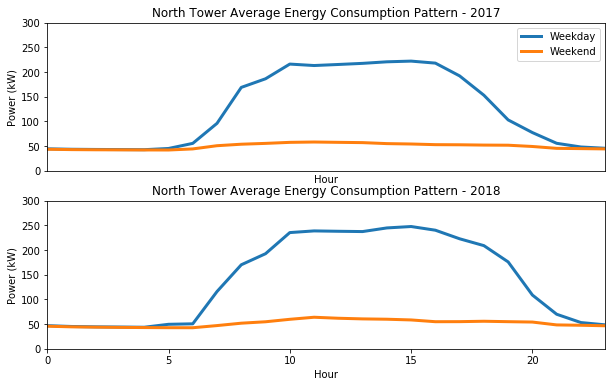

In [44]:
hourly_average_weekday_2017 = {}
hourly_average_weekend_2017 = {}
hourly_average_weekday_2018 = {}
hourly_average_weekend_2018 = {}

for hour in range(0,24):
    hourly_average_weekday_2017[hour] = (nt_2017_imputed.loc[np.logical_and(
        nt_2017_imputed['Date_start'].dt.hour == hour, nt_2017_imputed['Date_start'].dt.weekday.between(0,4)),
                                                             'Power_kW'].mean())
    hourly_average_weekend_2017[hour] = (nt_2017_imputed.loc[np.logical_and(
        nt_2017_imputed['Date_start'].dt.hour == hour, nt_2017_imputed['Date_start'].dt.weekday.between(5,6)),
                                                             'Power_kW'].mean())
    hourly_average_weekday_2018[hour] = (nt_2018_imputed.loc[np.logical_and(
        nt_2018_imputed['Date_start'].dt.hour == hour, nt_2018_imputed['Date_start'].dt.weekday.between(0,4)),
                                                             'Power_kW'].mean())
    hourly_average_weekend_2018[hour] = (nt_2018_imputed.loc[np.logical_and(
        nt_2018_imputed['Date_start'].dt.hour == hour, nt_2018_imputed['Date_start'].dt.weekday.between(5,6)),
                                                             'Power_kW'].mean())

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(list(hourly_average_weekday_2017.keys()), list(hourly_average_weekday_2017.values()), linewidth=3, label='Weekday')
ax1.plot(list(hourly_average_weekend_2017.keys()), list(hourly_average_weekend_2017.values()), linewidth=3, label='Weekend')
ax2.plot(list(hourly_average_weekday_2018.keys()), list(hourly_average_weekday_2018.values()), linewidth=3, label='Weekday')
ax2.plot(list(hourly_average_weekend_2018.keys()), list(hourly_average_weekend_2018.values()), linewidth=3, label='Weekend')
ax1.set_ylim(0,300)
ax2.set_ylim(0,300)
ax1.set_xlim(0,23)
ax2.set_xlim(0,23)
ax1.tick_params(bottom=False, labelbottom=False)
ax1.set_title('North Tower Average Energy Consumption Pattern - 2017')
ax2.set_title('North Tower Average Energy Consumption Pattern - 2018')
ax1.set_xlabel('Hour')
ax2.set_xlabel('Hour')
ax1.set_ylabel('Power (kW)')
ax2.set_ylabel('Power (kW)')
ax1.legend(loc='upper right')

From the above figure, it could be seen that the typical energy consumption pattern in the North Tower building stays pretty much the same throughout 2017 and 2018. During an average weekday, the energy consumption starts to rise at around 6 in the morning, peaking at around 10, and starts dropping off at around 5 in the afternoon. On the other hand, the energy consumption pattern stays pretty much constant throughout a typical day in the weekend.

## Pivot Tables and Plots

Before doing clustering, it is a good idea to construct pivot plots of the cleaned data in order to get a rough idea of what we could expect with regard to temporal patterns.

In [45]:
nt_2017_pivot = nt_2017_imputed.copy()
nt_2017_pivot.index = nt_2017_pivot['Date_start']
nt_2017_pivot['Hour'] = nt_2017_pivot.index.hour
nt_2017_pivot.index = nt_2017_pivot.index.date
nt_2017_pivot.head()

,Date_start,Date_end,Total_Ah,Power_kW,Hour
2017-01-01,2017-01-01 00:00:00,2017-01-01 01:00:00,196.780,42.996430,0
2017-01-01,2017-01-01 01:00:00,2017-01-01 02:00:00,195.661,42.751928,1
2017-01-01,2017-01-01 02:00:00,2017-01-01 03:00:00,196.164,42.861834,2
2017-01-01,2017-01-01 03:00:00,2017-01-01 04:00:00,193.674,42.317769,3
2017-01-01,2017-01-01 04:00:00,2017-01-01 05:00:00,195.210,42.653385,4


In [46]:
nt_2018_pivot = nt_2018_imputed.copy()
nt_2018_pivot.index = nt_2018_pivot['Date_start']
nt_2018_pivot['Hour'] = nt_2018_pivot.index.hour
nt_2018_pivot.index = nt_2018_pivot.index.date
nt_2018_pivot.head()

,Date_start,Date_end,Total_Ah,Power_kW,Hour
2018-01-01,2018-01-01 00:00:00,2018-01-01 01:00:00,186.244,40.694314,0
2018-01-01,2018-01-01 01:00:00,2018-01-01 02:00:00,187.510,40.970935,1
2018-01-01,2018-01-01 02:00:00,2018-01-01 03:00:00,188.115,41.103127,2
2018-01-01,2018-01-01 03:00:00,2018-01-01 04:00:00,187.799,41.034081,3
2018-01-01,2018-01-01 04:00:00,2018-01-01 05:00:00,185.627,40.559500,4


In [47]:
# Transform the DataFrame into a pivot table based on the'Hour' column
nt_2017_pivot = pd.pivot_table(nt_2017_pivot, index = nt_2017_pivot.index, columns = 'Hour', values = 'Power_kW')
nt_2017_pivot.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2017-01-01,42.996430,42.751928,42.861834,42.317769,42.653385,42.437725,42.307281,46.744797,46.521709,46.554047,...,47.892578,47.786387,48.019964,48.271676,48.695784,49.652377,48.608821,44.707940,44.293446,43.376620
2017-01-02,43.877641,42.577347,42.395555,42.240639,42.423305,45.799566,52.511886,86.142969,107.122466,119.850091,...,198.836966,199.730850,203.659261,152.156626,133.543704,99.438694,82.292563,58.237023,47.157762,43.198105
2017-01-03,43.569337,42.360813,41.889946,42.718935,42.611652,45.940936,49.360679,86.597013,109.177239,125.409604,...,210.415281,204.067638,198.071124,153.655318,138.646116,101.827118,82.365105,61.162739,52.301034,48.514647
2017-01-04,48.486898,47.967305,46.479757,46.368541,44.542317,49.322223,53.757118,89.052734,109.905282,126.593000,...,175.380227,168.215648,161.051070,153.886491,133.667157,100.006794,79.068376,59.149261,49.227832,47.202555
2017-01-05,46.359145,44.576185,43.438893,42.796503,43.191988,47.890175,52.149832,86.569918,107.671338,133.704301,...,199.730850,200.502155,201.316286,152.317224,138.870516,107.349924,83.712812,59.170237,48.865122,44.972107


In [48]:
nt_2018_pivot = pd.pivot_table(nt_2018_pivot, index = nt_2018_pivot.index, columns = 'Hour', values = 'Power_kW')
nt_2018_pivot.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2018-01-01,40.694314,40.970935,41.103127,41.034081,40.559500,39.889578,41.839472,51.078745,62.928874,63.284810,...,64.974253,64.788965,64.170609,65.449490,67.311984,63.504403,60.850720,46.479101,42.197157,41.874870
2018-01-02,40.754620,40.116382,40.629419,40.805749,40.317402,40.248356,48.354050,83.234953,104.358441,121.120450,...,170.948500,170.917255,167.325989,137.358933,127.805894,99.138694,77.694448,53.417350,43.082519,41.249085
2018-01-03,39.704946,39.132258,39.308369,39.674793,38.236189,38.782439,47.433291,82.457093,103.868127,125.523443,...,181.039267,183.914290,171.709973,147.910516,133.858125,100.841902,73.554747,50.517418,42.108446,38.857822
2018-01-04,37.604724,37.601009,38.669038,38.393728,37.819947,44.301967,43.006481,82.690232,105.850358,124.259857,...,208.475001,209.855266,195.134265,144.084362,134.531980,99.022452,79.029483,58.212770,48.034384,43.985580
2018-01-05,43.133866,42.463072,43.339038,42.573196,42.359503,41.706843,47.713845,88.221778,111.917229,132.898036,...,212.990085,209.494959,202.947388,151.479058,138.103144,103.966014,79.856069,59.748606,48.477721,44.105754


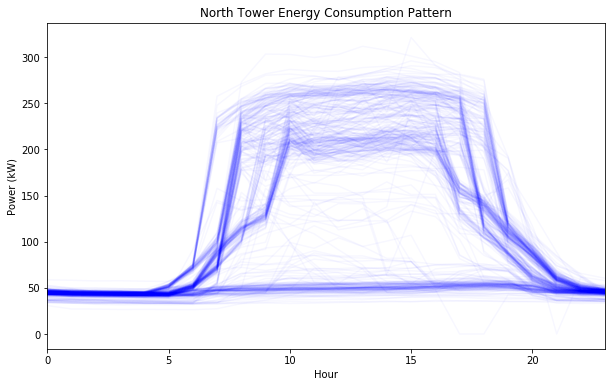

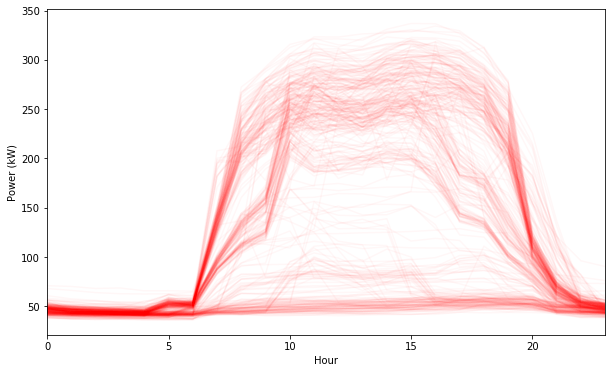

In [49]:
ax = nt_2017_pivot.T.plot(figsize = (10,6), legend = False,
                   color = 'blue', alpha = 0.03, title = 'North Tower Energy Consumption Pattern')
ax.set_ylabel('Power (kW)')
ax = nt_2018_pivot.T.plot(figsize = (10,6), legend = False,
                   color = 'red', alpha = 0.03)
ax.set_ylabel('Power (kW)')
plt.show()

From the above two figures, it could be inferred that there are roughly 3/4 patterns which could be identified:
* Almost flat line, most probably corresponds to weekends
* Demand starting to increase around 6:00, peaking at around 8:00 and plateauing until around 17:00, after which it continues to decrease
* Demand starting to increase around 6:00, peaking later at around 10:00 and staying more or less constant until around 16:00, decreasing afterwards
* Demand starting to increase around 5:00 and, peaking at around 6:00 until 19:00

# Clustering

## K-means Clustering

In [50]:
# Normalize values in the dataset to avoid bias in the scale
norm_values_2017 = nt_2017_pivot.dropna().values.copy()
norm_values_2018 = nt_2018_pivot.dropna().values.copy()

mm_scaler = MinMaxScaler()
norm_values_2017 = mm_scaler.fit_transform(norm_values_2017)
norm_values_2018 = mm_scaler.fit_transform(norm_values_2018)
print(norm_values_2017)
print(norm_values_2018)

[[0.43728098 0.5028816  0.52037734 ... 0.50456571 0.34425889 0.37090194]
 [0.46882822 0.49726599 0.50510328 ... 0.65725249 0.43214379 0.36428837]
 [0.45779099 0.49030095 0.48854088 ... 0.69027158 0.58995314 0.56125439]
 ...
 [0.39031602 0.4121955  0.42820333 ... 0.56475958 0.30091646 0.24962359]
 [0.29658166 0.36436092 0.37951816 ... 0.48741255 0.27755915 0.25057879]
 [0.31651283 0.40681182 0.41025953 ... 0.46630154 0.24873124 0.29351434]]
[[0.09269517 0.12009171 0.1424149  ... 0.0488014  0.06343912 0.06678974]
 [0.0945045  0.09432483 0.12736687 ... 0.12197353 0.07879854 0.05474631]
 [0.06301174 0.06465108 0.08540174 ... 0.09139028 0.06190014 0.0087256 ]
 ...
 [0.18141114 0.18333948 0.17901466 ... 0.02342596 0.08774809 0.07509903]
 [0.16103656 0.15396221 0.17305236 ... 0.04365119 0.12199976 0.15563527]
 [0.18817645 0.14803273 0.17647426 ... 0.02157788 0.05669568 0.03521358]]


In [51]:
silh_scores_2017 = {}
silh_scores_2018 = {}
n_clusters = np.arange(2,11).astype(int)

In [52]:
for n in n_clusters:
    kmeans_clustering = KMeans(n_clusters=n)
    kmeans_clustering.fit_predict(norm_values_2017)
    silh_scores_2017[n] = silhouette_score(norm_values_2017, kmeans_clustering.labels_)
    kmeans_clustering.fit_predict(norm_values_2018)
    silh_scores_2018[n] = silhouette_score(norm_values_2018, kmeans_clustering.labels_)

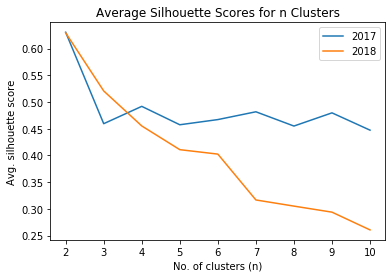

In [54]:
fig,ax = plt.subplots()
ax.plot(list(silh_scores_2017.keys()), list(silh_scores_2017.values()), label='2017')
ax.plot(list(silh_scores_2018.keys()), list(silh_scores_2018.values()), label='2018')
ax.set_title('Average Silhouette Scores for n Clusters')
ax.set_xlabel('No. of clusters (n)')
ax.set_ylabel('Avg. silhouette score')
ax.legend(loc='upper right')

From the above figure, it could be seen that according to the k-means clustering method, the highest average silhouette score is achieved when the number of clusters is equal to 2, which most probably correspond to one cluster for the weekdays and another for the weekend. It also implies that a feature which identifies whether the data point corresponds to a day during the week or in the weekend could potentially be important.

In [55]:
kmeans_clustering = KMeans(n_clusters=2)
kmeans_clustering.fit_predict(norm_values_2017)
labels_2017 = kmeans_clustering.labels_
print(pd.Series(kmeans_clustering.fit_predict(norm_values_2017)).value_counts())
kmeans_clustering.fit_predict(norm_values_2018)
labels_2018 = kmeans_clustering.labels_
print(pd.Series(kmeans_clustering.fit_predict(norm_values_2018)).value_counts())

0    240
1    124
dtype: int64
1    237
0    127
dtype: int64


The above results indicate that 240 and 237 data points are classified as belonging to cluster 1 by the KMeans clustering algorithm. This probably means that the data points classified as a member of cluster 1 should correspond to weekday observations and cluster 0 should be a cluster for the weekend.

In [56]:
nt_2017_cluster = pd.DataFrame(labels_2017, index=pd.to_datetime(nt_2017_pivot.dropna().index))
nt_2017_cluster.columns = ['Cluster']
nt_2017_cluster['Weekday'] = nt_2017_cluster.index.weekday
nt_2017_cluster['Weekend'] = 1
nt_2017_cluster.loc[nt_2017_cluster['Weekday'] >= 5, 'Weekend'] = 0
nt_2017_cluster

,Cluster,Weekday,Weekend
2017-01-01,0,6,0
2017-01-02,1,0,1
2017-01-03,1,1,1
2017-01-04,1,2,1
2017-01-05,1,3,1
...,...,...,...
2017-12-27,1,2,1
2017-12-28,1,3,1
2017-12-29,1,4,1
2017-12-30,0,5,0


In [57]:
nt_2017_cluster.groupby('Cluster')['Weekend'].sum()

Cluster
0     20
1    240
Name: Weekend, dtype: int64

It could be seen that the KMeans clustering algorithm misclassifies 20 data points corresponding to a weekday as weekend data, which is a fairly reasonable result considering that there are 364 data points.

## DBSCAN Clustering

In [58]:
nt_2017_dbscan = nt_2017_imputed['Power_kW'].copy()
#nt_2018_dbscan = nt_2018_imputed['Power_kW'].copy()

In [59]:
standard_values_2017 = StandardScaler().fit_transform(nt_2017_dbscan.values.reshape(-1,1))
#standard_values_2018 = StandardScaler().fit_transform(nt_2018_dbscan.values.reshape(-1,1))
print(standard_values_2017)
#print(standard_values_2018)

[[-0.75128796]
 [-0.75437507]
 [-0.75298739]
 ...
 [-0.77248663]
 [-0.77422192]
 [-0.77286183]]


In [60]:
dbscan_clustering = DBSCAN(eps=0.1, min_samples=5).fit(standard_values_2017)
core_samples_mask = np.zeros_like(dbscan_clustering.labels_, dtype=bool)
core_samples_mask[dbscan_clustering.core_sample_indices_] = True
dbscan_labels_2017 = dbscan_clustering.labels_
np.unique(dbscan_labels_2017)
#dbscan_clustering = DBSCAN(eps=0.1, min_samples=5).fit(standard_values_2018)
#core_samples_mask = np.zeros_like(dbscan_clustering.labels_, dtype=bool)
#core_samples_mask[dbscan_clustering.core_sample_indices_] = True
#dbscan_labels_2018 = dbscan_clustering.labels_
#np.unique(dbscan_labels_2018)

array([-1,  0], dtype=int64)

In [61]:
n_clusters_2017 = len(set(dbscan_labels_2017)) - (1 if -1 in dbscan_labels_2017 else 0)
n_noise_2017 = list(dbscan_labels_2017).count(-1)
#n_clusters_2018 = len(set(dbscan_labels_2018)) - (1 if -1 in dbscan_labels_2018 else 0)
#n_noise_2018 = list(dbscan_labels_2018).count(-1)

print('2017 Data')
print('Estimated number of clusters: {}'.format(n_clusters_2017))
print('Estimated number of noise points: {}'.format(n_noise_2017))
print('Silhouette score: {:.3f}'.format(metrics.silhouette_score(standard_values_2017, dbscan_labels_2017)))
#print('\n2018 Data')
#print('Estimated number of clusters: {}'.format(n_clusters_2018))
#print('Estimated number of noise points: {}'.format(n_noise_2018))
#print('Silhouette score: {:.3f}'.format(metrics.silhouette_score(standard_values_2018, dbscan_labels_2018)))

2017 Data
Estimated number of clusters: 1
Estimated number of noise points: 4
Silhouette score: 0.404


From the above result, it could be concluded that according to the DBSCAN clustering algorithm, there exists only one cluster for all data points. This result doesn't provide a useful information as to how we could build a model which could potentially perform better.

# Feature Extraction/Engineering

In [62]:
# Combine the 2 DataFrames 
nt_combined = nt_2017_imputed.append(nt_2018_imputed, ignore_index=True)

In [63]:
# Set the index of the combined DataFrame to be equal to 'Date_start'
nt_combined.index = nt_combined.loc[:,'Date_start']

## Hour and Day of the Week

In [64]:
# Create 2 new features: 'Hour' and 'Weekday'
#'Hour' represents the hour contained in 'Date_start'
#'Weekday' represents the day of the week, 0 for Monday, 1 for Tuesday, ... , 6 for Sunday
nt_combined['Hour'] = nt_combined.index.hour
nt_combined['Weekday'] = nt_combined.index.weekday
nt_combined.to_csv('IST_North_Tower_2017_2018_cleaned.csv')
nt_combined.head()

,Date_start,Date_end,Total_Ah,Power_kW,Hour,Weekday
Date_start,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 01:00:00,196.780,42.996430,0,6
2017-01-01 01:00:00,2017-01-01 01:00:00,2017-01-01 02:00:00,195.661,42.751928,1,6
2017-01-01 02:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00,196.164,42.861834,2,6
2017-01-01 03:00:00,2017-01-01 03:00:00,2017-01-01 04:00:00,193.674,42.317769,3,6
2017-01-01 04:00:00,2017-01-01 04:00:00,2017-01-01 05:00:00,195.210,42.653385,4,6


## Power from the Previous 2 Hours

In [65]:
# Create 2 new features 'Power(h-1)' and 'Power(h-2)', representing the power recorded for the preceding hour and the hour
# before that for each data point
nt_combined['Power(h-1)'] = nt_combined['Power_kW'].shift(1)
nt_combined['Power(h-2)'] = nt_combined['Power_kW'].shift(2)
# Remove the NAs generated as as result of the addition of the new features. This means that we're losing 2 data points but
# it should be acceptable given the size of the dataset
nt_FES = nt_combined.dropna()
nt_FES.head()

,Date_start,Date_end,Total_Ah,Power_kW,Hour,Weekday,Power(h-1),Power(h-2)
Date_start,,,,,,,,
2017-01-01 02:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00,196.164,42.861834,2,6,42.751928,42.996430
2017-01-01 03:00:00,2017-01-01 03:00:00,2017-01-01 04:00:00,193.674,42.317769,3,6,42.861834,42.751928
2017-01-01 04:00:00,2017-01-01 04:00:00,2017-01-01 05:00:00,195.210,42.653385,4,6,42.317769,42.861834
2017-01-01 05:00:00,2017-01-01 05:00:00,2017-01-01 06:00:00,194.223,42.437725,5,6,42.653385,42.317769
2017-01-01 06:00:00,2017-01-01 06:00:00,2017-01-01 07:00:00,193.626,42.307281,6,6,42.437725,42.653385


## Period Identification

In [66]:
# Create a new feature called 'Period' for the dataset to identify different periods during the study year, namely:
# 1. Regular - refers to the period during which classes occur as usual
# 2. Exam - refers to the exam period, including exam preparation 
# 3. Holiday - self-explanatory, includes national holidays and unofficial holidays (e.g. Carnaval)

nt_FES_enhanced = nt_FES.copy()
nt_FES_enhanced['Period'] = "Regular"

exams_2017 = [[1,1,2,4], [6,5,7,8], [7,17,7,28]]
for dates in exams_2017:
    nt_FES_enhanced.loc[np.logical_and(nt_FES_enhanced.index.date >= datetime.date(2017,dates[0],dates[1]), 
                                      nt_FES_enhanced.index.date <= datetime.date(2017,dates[2],dates[3])),
           'Period'] = "Exam"

holidays_2017 = [[2,5,2,19], [2,27,2,28], [4,10,4,14], [7,29,9,17], [12,23,12,31]]
for dates in holidays_2017:
    nt_FES_enhanced.loc[np.logical_and(nt_FES_enhanced.index.date >= datetime.date(2017,dates[0],dates[1]), 
                                      nt_FES_enhanced.index.date <= datetime.date(2017,dates[2],dates[3])),
           'Period'] = "Holiday"

public_holidays_2017 = [[1,1], [4,14], [4,16], [4,25], [5,1], [6,10], [6,15], [8,15], [10,5], [11,1], [12,1], [12,8], [12,25]]
for dates in public_holidays_2017:
    nt_FES_enhanced.loc[nt_FES_enhanced.index.date == datetime.date(2017,dates[0],dates[1]), 'Period'] = "Holiday"
    
exams_2018 = [[1,1,2,3], [6,4,7,7], [7,16,7,27]]
for dates in exams_2018:
    nt_FES_enhanced.loc[np.logical_and(nt_FES_enhanced.index.date >= datetime.date(2018,dates[0],dates[1]), 
                                      nt_FES_enhanced.index.date <= datetime.date(2018,dates[2],dates[3])),
           'Period'] = "Exam"

holidays_2018 = [[2,4,2,18], [3,26,3,30], [7,28,9,16], [12,22,12,31]]
for dates in holidays_2018:
    nt_FES_enhanced.loc[np.logical_and(nt_FES_enhanced.index.date >= datetime.date(2018,dates[0],dates[1]), 
                                      nt_FES_enhanced.index.date <= datetime.date(2018,dates[2],dates[3])),
           'Period'] = "Holiday"
    
public_holidays_2018 = [[1,1], [3,30], [4,1], [4,25], [5,1], [5,31], [6,10], [8,15], [10,5], [11,1], [12,1], [12,8], [12,25]]
for dates in public_holidays_2018:
    nt_FES_enhanced.loc[nt_FES_enhanced.index.date == datetime.date(2018,dates[0],dates[1]), 'Period'] = "Holiday"

nt_FES_enhanced[nt_FES_enhanced['Period'] == 'Regular']

,Date_start,Date_end,Total_Ah,Power_kW,Hour,Weekday,Power(h-1),Power(h-2),Period
Date_start,,,,,,,,,
2017-02-20 00:00:00,2017-02-20 00:00:00,2017-02-20 01:00:00,194.301,42.454769,0,0,42.682227,43.605171,Regular
2017-02-20 01:00:00,2017-02-20 01:00:00,2017-02-20 02:00:00,190.992,41.731752,1,0,42.454769,42.682227,Regular
2017-02-20 02:00:00,2017-02-20 02:00:00,2017-02-20 03:00:00,194.314,42.457609,2,0,41.731752,42.454769,Regular
2017-02-20 03:00:00,2017-02-20 03:00:00,2017-02-20 04:00:00,191.547,41.853020,3,0,42.457609,41.731752,Regular
2017-02-20 04:00:00,2017-02-20 04:00:00,2017-02-20 05:00:00,193.897,42.366495,4,0,41.853020,42.457609,Regular
...,...,...,...,...,...,...,...,...,...
2018-12-21 19:00:00,2018-12-21 19:00:00,2018-12-21 20:00:00,883.376,193.017656,19,4,156.180304,177.787988,Regular
2018-12-21 20:00:00,2018-12-21 20:00:00,2018-12-21 21:00:00,704.345,153.899383,20,4,193.017656,156.180304,Regular
2018-12-21 21:00:00,2018-12-21 21:00:00,2018-12-21 22:00:00,555.720,121.424820,21,4,153.899383,193.017656,Regular


In [67]:
nt_FES_enhanced['Period'].value_counts()

Regular    9384
Holiday    4390
Exam       3744
Name: Period, dtype: int64

Since 'Period' should naturally be classified as a categorical variable, it would make sense to code the variable to reflect this. It is achieved by creating dummy variables to replace 'Period' with 3 variables which take the value of 1 if the data point corresponds to the period and 0 otherwise. Note that it is necessary to drop one of these variables to avoid multi-collinearity (also commonly referred to as 'the dummy variable trap').

In [68]:
nt_FES_enhanced_cat = nt_FES_enhanced.join(pd.get_dummies(nt_FES_enhanced['Period'], prefix = 'Period', drop_first=True))
nt_FES_enhanced_cat = nt_FES_enhanced_cat.drop(columns = 'Period')
nt_FES_enhanced_cat = nt_FES_enhanced_cat.drop_duplicates()
nt_FES_enhanced_cat

,Date_start,Date_end,Total_Ah,Power_kW,Hour,Weekday,Power(h-1),Power(h-2),Period_Holiday,Period_Regular
Date_start,,,,,,,,,,
2017-01-01 02:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00,196.164,42.861834,2,6,42.751928,42.996430,1,0
2017-01-01 03:00:00,2017-01-01 03:00:00,2017-01-01 04:00:00,193.674,42.317769,3,6,42.861834,42.751928,1,0
2017-01-01 04:00:00,2017-01-01 04:00:00,2017-01-01 05:00:00,195.210,42.653385,4,6,42.317769,42.861834,1,0
2017-01-01 05:00:00,2017-01-01 05:00:00,2017-01-01 06:00:00,194.223,42.437725,5,6,42.653385,42.317769,1,0
2017-01-01 06:00:00,2017-01-01 06:00:00,2017-01-01 07:00:00,193.626,42.307281,6,6,42.437725,42.653385,1,0
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,2018-12-31 19:00:00,2018-12-31 20:00:00,320.971,70.132164,19,0,102.898642,107.208992,1,0
2018-12-31 20:00:00,2018-12-31 20:00:00,2018-12-31 21:00:00,268.474,58.661569,20,0,70.132164,102.898642,1,0
2018-12-31 21:00:00,2018-12-31 21:00:00,2018-12-31 22:00:00,200.905,43.897742,21,0,58.661569,70.132164,1,0


In [69]:
nt_FES_enhanced_cat.dtypes

Date_start        datetime64[ns]
Date_end          datetime64[ns]
Total_Ah                 float64
Power_kW                 float64
Hour                       int64
Weekday                    int64
Power(h-1)               float64
Power(h-2)               float64
Period_Holiday             uint8
Period_Regular             uint8
dtype: object

## Weather Data 

In [70]:
# Read the csv file containing the weather data
weather_df = pd.read_csv('emaIST_2017_2018_2019.csv')
weather_df.head()

,yyyy-mm-dd hh:mm:ss,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2017-01-01 00:00:00,8.72,74.6,2.138,3.774,1029,1.163,0.0,0.0
1,2017-01-01 00:05:00,8.68,74.6,1.929,3.019,1029,1.496,0.0,0.0
2,2017-01-01 00:10:00,8.69,74.5,1.824,2.516,1029,1.025,0.0,0.0
3,2017-01-01 00:15:00,8.62,75.1,2.264,3.271,1029,1.690,0.0,0.0
4,2017-01-01 00:20:00,8.63,75.0,3.061,3.774,1029,1.108,0.0,0.0


In [71]:
# Rename the columns
col_names = ['date', 'temp_C', 'humidity', 'wind_speed', 'wind_gust', 'pressure', 'irradiance', 'precipitation', 'rain_day']
weather_df.columns = col_names
weather_df.head()

,date,temp_C,humidity,wind_speed,wind_gust,pressure,irradiance,precipitation,rain_day
0,2017-01-01 00:00:00,8.72,74.6,2.138,3.774,1029,1.163,0.0,0.0
1,2017-01-01 00:05:00,8.68,74.6,1.929,3.019,1029,1.496,0.0,0.0
2,2017-01-01 00:10:00,8.69,74.5,1.824,2.516,1029,1.025,0.0,0.0
3,2017-01-01 00:15:00,8.62,75.1,2.264,3.271,1029,1.690,0.0,0.0
4,2017-01-01 00:20:00,8.63,75.0,3.061,3.774,1029,1.108,0.0,0.0


In [72]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df.dtypes

date             datetime64[ns]
temp_C                  float64
humidity                float64
wind_speed              float64
wind_gust               float64
pressure                  int64
irradiance              float64
precipitation           float64
rain_day                float64
dtype: object

In [73]:
weather_df.index = weather_df['date']

In [74]:
# Resample into hourly bins and represent each data point by the mean of the corresponding hour 
weather_df_hourly = weather_df.resample('H').mean()
weather_df_hourly.head()

,temp_C,humidity,wind_speed,wind_gust,pressure,irradiance,precipitation,rain_day
date,,,,,,,,
2017-01-01 00:00:00,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0
2017-01-01 01:00:00,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0
2017-01-01 02:00:00,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0
2017-01-01 03:00:00,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0
2017-01-01 04:00:00,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0


In [75]:
# Subset the weather data since our data should only contain observations from 2017 and 2018
weather_end_date = datetime.date(2019,1,1)
weather_df_hourly = weather_df_hourly[weather_df_hourly.index.date < weather_end_date]
weather_df_hourly.tail()

,temp_C,humidity,wind_speed,wind_gust,pressure,irradiance,precipitation,rain_day
date,,,,,,,,
2018-12-31 19:00:00,13.361667,54.013333,0.0,0.0,1031.0,1.112333,0.0,0.0
2018-12-31 20:00:00,12.810000,55.441667,0.0,0.0,1031.0,1.322417,0.0,0.0
2018-12-31 21:00:00,12.565000,55.291667,0.0,0.0,1031.0,1.195500,0.0,0.0
2018-12-31 22:00:00,11.926667,56.530000,0.0,0.0,1031.0,1.117000,0.0,0.0
2018-12-31 23:00:00,11.338571,58.050000,0.0,0.0,1031.0,1.388643,0.0,0.0


In [76]:
weather_df_hourly[weather_df_hourly.isnull().any(axis='columns')]

,temp_C,humidity,wind_speed,wind_gust,pressure,irradiance,precipitation,rain_day
date,,,,,,,,
2017-01-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-12-12 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-12 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-12 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It could be seen that there is a significant amount of missing information in the weather data. Regardless, we should not spend too much time on trying to fill out the missing values and therefore, a simple linear interpolation approach is taken in this project.

In [77]:
weather_df_hourly = weather_df_hourly.interpolate()

In [78]:
nt_FES_enhanced_cat = nt_FES_enhanced_cat.join(weather_df_hourly)
nt_FES_enhanced_cat.head()

,Date_start,Date_end,Total_Ah,Power_kW,Hour,Weekday,Power(h-1),Power(h-2),Period_Holiday,Period_Regular,temp_C,humidity,wind_speed,wind_gust,pressure,irradiance,precipitation,rain_day
2017-01-01 02:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00,196.164,42.861834,2,6,42.751928,42.996430,1,0,7.263417,80.275000,3.300250,4.067167,1028.0,1.415083,0.0,0.0
2017-01-01 03:00:00,2017-01-01 03:00:00,2017-01-01 04:00:00,193.674,42.317769,3,6,42.861834,42.751928,1,0,6.831333,81.333333,3.534333,4.423583,1028.0,1.542000,0.0,0.0
2017-01-01 04:00:00,2017-01-01 04:00:00,2017-01-01 05:00:00,195.210,42.653385,4,6,42.317769,42.861834,1,0,6.500250,81.241667,4.006000,5.262333,1028.0,0.891000,0.0,0.0
2017-01-01 05:00:00,2017-01-01 05:00:00,2017-01-01 06:00:00,194.223,42.437725,5,6,42.653385,42.317769,1,0,6.006417,81.008333,4.552833,6.079333,1028.0,1.375833,0.0,0.0
2017-01-01 06:00:00,2017-01-01 06:00:00,2017-01-01 07:00:00,193.626,42.307281,6,6,42.437725,42.653385,1,0,5.645833,80.441667,4.004417,5.346417,1027.0,0.988000,0.0,0.0


In [79]:
nt_FES_enhanced_cat[nt_FES_enhanced_cat.isnull().any(axis=1)]

,Date_start,Date_end,Total_Ah,Power_kW,Hour,Weekday,Power(h-1),Power(h-2),Period_Holiday,Period_Regular,temp_C,humidity,wind_speed,wind_gust,pressure,irradiance,precipitation,rain_day


Some of the features contained in the weather data are dropped for the following reasons:
* 'humidity': correlated with temperature
* 'wind_speed', 'wind_gust', and 'pressure': expected to have little to no correlation to energy consumption
* 'rain_day': contains more or less the same information as 'precipitation'

In [80]:
nt_FES_enhanced_cat = nt_FES_enhanced_cat.drop(columns=['humidity', 'wind_speed', 'wind_gust', 'pressure', 'rain_day'])
nt_FES_enhanced_cat.head()

,Date_start,Date_end,Total_Ah,Power_kW,Hour,Weekday,Power(h-1),Power(h-2),Period_Holiday,Period_Regular,temp_C,irradiance,precipitation
2017-01-01 02:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00,196.164,42.861834,2,6,42.751928,42.996430,1,0,7.263417,1.415083,0.0
2017-01-01 03:00:00,2017-01-01 03:00:00,2017-01-01 04:00:00,193.674,42.317769,3,6,42.861834,42.751928,1,0,6.831333,1.542000,0.0
2017-01-01 04:00:00,2017-01-01 04:00:00,2017-01-01 05:00:00,195.210,42.653385,4,6,42.317769,42.861834,1,0,6.500250,0.891000,0.0
2017-01-01 05:00:00,2017-01-01 05:00:00,2017-01-01 06:00:00,194.223,42.437725,5,6,42.653385,42.317769,1,0,6.006417,1.375833,0.0
2017-01-01 06:00:00,2017-01-01 06:00:00,2017-01-01 07:00:00,193.626,42.307281,6,6,42.437725,42.653385,1,0,5.645833,0.988000,0.0


## Alternative Approach: Separate Models for Weekdays and Weekend

In [81]:
# Create a new dataset for an alternative approach of building separate models for weekdays and weekend 
nt_FES_alt = nt_FES_enhanced_cat.copy()
nt_FES_alt['Weekend'] = 0
nt_FES_alt.loc[nt_FES_alt['Weekday'] >= 5, 'Weekend'] = 1
nt_FES_alt

,Date_start,Date_end,Total_Ah,Power_kW,Hour,Weekday,Power(h-1),Power(h-2),Period_Holiday,Period_Regular,temp_C,irradiance,precipitation,Weekend
2017-01-01 02:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00,196.164,42.861834,2,6,42.751928,42.996430,1,0,7.263417,1.415083,0.0,1
2017-01-01 03:00:00,2017-01-01 03:00:00,2017-01-01 04:00:00,193.674,42.317769,3,6,42.861834,42.751928,1,0,6.831333,1.542000,0.0,1
2017-01-01 04:00:00,2017-01-01 04:00:00,2017-01-01 05:00:00,195.210,42.653385,4,6,42.317769,42.861834,1,0,6.500250,0.891000,0.0,1
2017-01-01 05:00:00,2017-01-01 05:00:00,2017-01-01 06:00:00,194.223,42.437725,5,6,42.653385,42.317769,1,0,6.006417,1.375833,0.0,1
2017-01-01 06:00:00,2017-01-01 06:00:00,2017-01-01 07:00:00,193.626,42.307281,6,6,42.437725,42.653385,1,0,5.645833,0.988000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,2018-12-31 19:00:00,2018-12-31 20:00:00,320.971,70.132164,19,0,102.898642,107.208992,1,0,13.361667,1.112333,0.0,0
2018-12-31 20:00:00,2018-12-31 20:00:00,2018-12-31 21:00:00,268.474,58.661569,20,0,70.132164,102.898642,1,0,12.810000,1.322417,0.0,0
2018-12-31 21:00:00,2018-12-31 21:00:00,2018-12-31 22:00:00,200.905,43.897742,21,0,58.661569,70.132164,1,0,12.565000,1.195500,0.0,0
2018-12-31 22:00:00,2018-12-31 22:00:00,2018-12-31 23:00:00,191.343,41.808446,22,0,43.897742,58.661569,1,0,11.926667,1.117000,0.0,0


## Interaction Feature Engineering

To-be added if necessary.

# Feature Selection

In [82]:
# Create a dictionary to store the aggregated result of various FS methods
fs_dict = {}
feature_names = nt_FES_enhanced_cat.columns[4:]
for key in feature_names:
    fs_dict[key] = 0

## Filter Method - kBest

In [83]:
y = nt_FES_enhanced_cat['Power_kW'].values
x = nt_FES_enhanced_cat.iloc[:, 4:].values

In [84]:
kbest_features = SelectKBest(k=6)
kbest_fit = kbest_features.fit(x,y)
print(kbest_fit.scores_)
print(kbest_fit.transform(x))

[ 1.03757531  0.96546347 94.28597085 26.19051767  1.15217218  0.98198764
  1.29682826  2.50536041  1.24092388]
[[42.7519285  42.99643     1.          7.26341667  1.41508333  0.        ]
 [42.861834   42.7519285   1.          6.83133333  1.542       0.        ]
 [42.317769   42.861834    1.          6.50025     0.891       0.        ]
 ...
 [58.661569   70.1321635   1.         12.565       1.1955      0.        ]
 [43.8977425  58.661569    1.         11.92666667  1.117       0.        ]
 [41.8084455  43.8977425   1.         11.33857143  1.38864286  0.        ]]


In [85]:
for feature in feature_names[kbest_fit.get_support()]:
    fs_dict[feature] += 1
fs_dict

{'Hour': 0,
 'Weekday': 0,
 'Power(h-1)': 1,
 'Power(h-2)': 1,
 'Period_Holiday': 1,
 'Period_Regular': 0,
 'temp_C': 1,
 'irradiance': 1,
 'precipitation': 1}

## Wrapper Method - Recursive Feature Elimination (RFE)

In [86]:
lm = linear_model.LinearRegression()

rfe_features = RFE(lm, 6)
rfe_fit = rfe_features.fit(x,y)

In [87]:
print(rfe_fit.ranking_)

[1 1 1 1 1 3 2 4 1]


In [88]:
for feature in feature_names[rfe_fit.support_]:
    fs_dict[feature] += 1
fs_dict

{'Hour': 1,
 'Weekday': 1,
 'Power(h-1)': 2,
 'Power(h-2)': 2,
 'Period_Holiday': 2,
 'Period_Regular': 0,
 'temp_C': 1,
 'irradiance': 1,
 'precipitation': 2}

## Ensemble Method - Extra Trees Classifier

In [89]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 4,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_leaf_nodes': None}

etc_features = ExtraTreesClassifier(**parameters)
# Convert 'y' vector to int type because Extra Trees Classifier doesn't accept float as the output. In doing so, we lose some 
# information contained in the output so this should be avoided whenever possible.
y_etc = y.astype(int)
etc_fit = etc_features.fit(x,y_etc)
print(etc_fit.feature_importances_)

[0.17425824 0.10928993 0.27445592 0.18669021 0.02544127 0.03670825
 0.0872465  0.09739199 0.0085177 ]


In [90]:
for feature in feature_names[etc_fit.feature_importances_ >= np.sort(etc_fit.feature_importances_)[-6:][0]]:
    fs_dict[feature] += 1
fs_dict

{'Hour': 2,
 'Weekday': 2,
 'Power(h-1)': 3,
 'Power(h-2)': 3,
 'Period_Holiday': 2,
 'Period_Regular': 0,
 'temp_C': 2,
 'irradiance': 2,
 'precipitation': 2}

The aggregation of various feature selection methods doesn't give a definitive answer as to which features should be kept in the prediction model. Therefore, it would make sense to keep all of them since the amount of features (9) is still reasonable.

## Principal Component Analysis (PCA)

In [91]:
pca_features = PCA(n_components=3)
x_pca = pca_features.fit_transform(x)
print(x_pca)

[[-205.05765014  -51.72889014    2.93632608]
 [-204.9502244   -51.83242469    3.07967558]
 [-205.65864933  -51.96089525    2.52369092]
 ...
 [-198.91296233  -21.21646573   -6.47421369]
 [-202.92244649  -39.2430099    -9.34362241]
 [-205.0099222   -51.16016314   -0.85037506]]


# Forecasting

In order to apply the forecasting model to the 2019 data, simply replace the vectors 'x_test' and 'y_test' with the values from the new dataset and rerun all the cells under this heading (Forecasting). For the algorithm to work correctly the vector 'x_test' should have the following columns in order:
1. Hour of the day, indicating the starting hour of the measurement
2. Weekday (0 for Monday, 1 for Tuesday, ... , 6 for Sunday)
3. Power from the previous hour
4. Power from two hours ago
5. Categorical variable identifying whether the data point corresponds to a holiday (1 if holiday, 0 otherwise)
6. Categorical variable identifying whether the data point corresponds to regular period during the semester (1 if regular, 0 otherwise)
7. Temperature in degrees Celcius
8. Irradiance in W/m2
9. Precipitation in mm/h

Note: if both 5 and 6 are 0, it means that the data point corresponds to exam/exam preparation period

## Linear Regression

In [92]:
values = nt_FES_enhanced_cat.values
#values = nt_FES.values
y = values[:, 3]
x = values[:, 4:]

#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y)
#x_train =  nt_FES_enhanced_cat.loc[nt_FES_enhanced_cat['Date_start'].dt.year == 2017, nt_FES_enhanced_cat.columns[4:]].values
#y_train = nt_FES_enhanced_cat.loc[nt_FES_enhanced_cat['Date_start'].dt.year == 2017, 'Power_kW'].values
#x_test =  nt_FES_enhanced_cat.loc[nt_FES_enhanced_cat['Date_start'].dt.year == 2018, nt_FES_enhanced_cat.columns[4:]].values
#y_test = nt_FES_enhanced_cat.loc[nt_FES_enhanced_cat['Date_start'].dt.year == 2018, 'Power_kW'].values
print(x_train)
print(y_train)

[[9 2 115.6605715 ... 3.695833333333333 186.70833333333334 0.0]
 [13 4 54.14364449999999 ... 30.77916666666667 963.8333333333334 0.0]
 [17 5 54.2952835 ... 23.888471615720526 178.80762736535664 0.0]
 ...
 [22 5 46.2667195 ... 9.998333333333333 1.0688333333333333 0.0]
 [5 3 43.4310265 ... 7.283333333333334 1.68975 0.0]
 [8 3 34.2815575 ... 19.492500000000003 485.0083333333334 0.0]]
[137.92659550000002 50.7429105 53.245828 ... 42.8690445 43.2855055
 38.5038515]


In [93]:
lm = linear_model.LinearRegression()

lm.fit(x_train, y_train)

y_pred_LR = lm.predict(x_test)

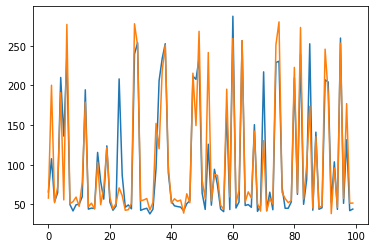

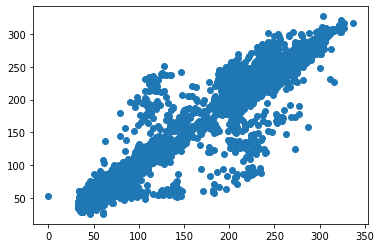

In [94]:
plt.plot(y_test[900:1000])
plt.plot(y_pred_LR[900:1000])
plt.show()
plt.scatter(y_test, y_pred_LR)

In [95]:
MAE_LR = metrics.mean_absolute_error(y_test, y_pred_LR)
MSE_LR = metrics.mean_squared_error(y_test, y_pred_LR)
RMSE_LR = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

14.328025186882359 633.3407746901108 25.166262628569044


In [96]:
lm.coef_

array([-0.51406491, -1.57842214,  1.22352377, -0.33315657, -2.41558349,
        1.03310027, -0.24238523,  0.02599084,  2.34668273])

## Random Forest

In [97]:
# Build the model
parameters = {'bootstrap': True,
              'min_samples_leaf': 4,
              'n_estimators': 200, 
              'min_samples_split': 13,
              'max_features': 'sqrt',
              'max_depth': 15,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

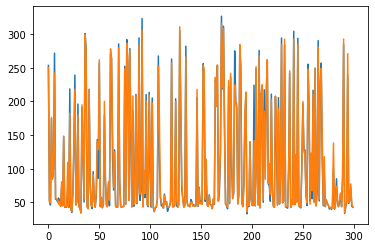

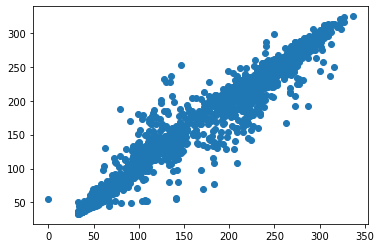

In [98]:
# Plot graphs
plt.plot(y_test[1000:1300])
plt.plot(y_pred_RF[1000:1300])
plt.show()
plt.scatter(y_test, y_pred_RF)

In [99]:
# Calculate errors
# score = metrics.accuracy_score(y_test ,y_pred_RF)
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

6.126453427947171 170.51047843556674 13.057966091071256


## Gradient Boosting Regression

In [100]:
# Build the model
parameters = {'n_estimators' : 200,
             'min_samples_split' : 10,
             'min_samples_leaf' : 3,
             'max_depth' : 15}

GBR_model = GradientBoostingRegressor(**parameters)
GBR_model.fit(x_train,y_train)
y_pred_GBR = GBR_model.predict(x_test)

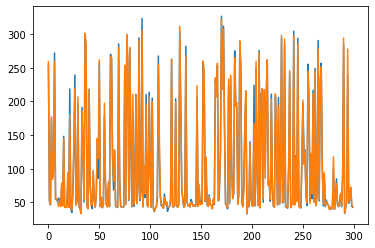

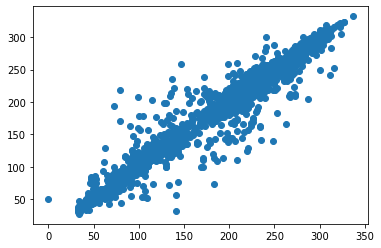

In [101]:
# Plot graphs
plt.plot(y_test[1000:1300])
plt.plot(y_pred_GBR[1000:1300])
plt.show()
plt.scatter(y_test, y_pred_GBR)

In [102]:
# Calculate errors
# score = metrics.accuracy_score(y_test ,y_pred_RF)
# Evaluate errors
MAE_GBR=metrics.mean_absolute_error(y_test,y_pred_GBR) 
MSE_GBR=metrics.mean_squared_error(y_test,y_pred_GBR)  
RMSE_GBR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_GBR))
print(MAE_GBR,MSE_GBR,RMSE_GBR)

5.583860980773422 159.68835229787877 12.636785679035581


## Artificial Neural Network

In [103]:
# ANN is sensitive to feature scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train_ANN = scaler.transform(x_train)
x_test_ANN = scaler.transform(x_test)
#activation_list = ['identity', 'logistic', 'tanh', 'relu']
#ANN_results = {}

#for activation in activation_list:
parameters = {'hidden_layer_sizes':(100,20),
              'max_iter':2000,
              'early_stopping':True,
              'validation_fraction':0.2,
              'alpha':0.00001,
              'learning_rate_init':0.1}

ANN_model = MLPRegressor(**parameters)
ANN_model.fit(x_train_ANN, y_train)
y_pred_ANN = ANN_model.predict(x_test_ANN)
#MAE_ANN=metrics.mean_absolute_error(y_test,y_pred_ANN)
#ANN_results[activation] = MAE_ANN
#print(ANN_results)

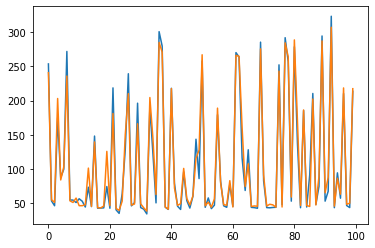

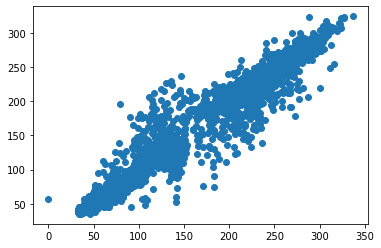

In [104]:
# Plot graphs
plt.plot(y_test[1000:1100])
plt.plot(y_pred_ANN[1000:1100])
plt.show()
plt.scatter(y_test, y_pred_ANN)

In [105]:
# Calculate errors
# score = metrics.accuracy_score(y_test ,y_pred_RF)
# Evaluate errors
MAE_ANN=metrics.mean_absolute_error(y_test,y_pred_ANN) 
MSE_ANN=metrics.mean_squared_error(y_test,y_pred_ANN)  
RMSE_ANN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_ANN))
print(MAE_ANN,MSE_ANN,RMSE_ANN)

9.346988878188862 274.7542672526627 16.57571317478264


## Ensemble Forecasting Implementation

The ensemble forecasting algorithm implements the following:
* Calculate the absolute errors between the test values ('y_test') and the predicted values ('y_pred_XX') for each forecasting algorithm
* For each data point (/each row), calculate the minimum error given by the algorithms
* Identify which algorithm performs best in each row
* Create a new predicted values vector ('y_pred_composite') which contains the minimum error predicted values identified in the previous step for each row

In [106]:
LR_abs_error = np.reshape(abs(y_test-y_pred_LR), (-1,1))
RF_abs_error = np.reshape(abs(y_test-y_pred_RF), (-1,1))
GBR_abs_error = np.reshape(abs(y_test-y_pred_GBR), (-1,1))
ANN_abs_error = np.reshape(abs(y_test-y_pred_ANN), (-1,1))

abs_error_df = pd.DataFrame(np.concatenate((LR_abs_error, RF_abs_error, GBR_abs_error, ANN_abs_error),
                                           axis=1), columns=['LR', 'RF', 'GBR', 'ANN'])
abs_error_df.head()

,LR,RF,GBR,ANN
0,8.33762,1.77265,2.59551,2.08944
1,20.7233,43.0613,29.5504,29.5641
2,8.88963,4.13212,5.09858,8.25442
3,14.7124,0.0520924,0.0533785,4.7222
4,0.391122,0.23515,0.593493,1.53227


In [107]:
abs_error_df['Composite'] = abs_error_df.min(axis=1)
abs_error_df.head()

,LR,RF,GBR,ANN,Composite
0,8.33762,1.77265,2.59551,2.08944,1.772652
1,20.7233,43.0613,29.5504,29.5641,20.723329
2,8.88963,4.13212,5.09858,8.25442,4.132119
3,14.7124,0.0520924,0.0533785,4.7222,0.052092
4,0.391122,0.23515,0.593493,1.53227,0.235150


In [108]:
abs_error_df['Choice_RF'] = False
abs_error_df['Choice_GBR'] = False
abs_error_df['Choice_ANN'] = False

abs_error_df.loc[abs_error_df['RF'] == abs_error_df['Composite'], 'Choice_RF'] = True
abs_error_df.loc[abs_error_df['GBR'] == abs_error_df['Composite'], 'Choice_GBR'] = True
abs_error_df.loc[abs_error_df['ANN'] == abs_error_df['Composite'], 'Choice_ANN'] = True

In [109]:
y_pred_composite = y_pred_LR.copy()

In [110]:
RF_mask = np.where(abs_error_df['Choice_RF'])
GBR_mask = np.where(abs_error_df['Choice_GBR'])
ANN_mask = np.where(abs_error_df['Choice_ANN'])

y_pred_composite[RF_mask] = y_pred_RF[RF_mask]
y_pred_composite[GBR_mask] = y_pred_GBR[GBR_mask]
y_pred_composite[ANN_mask] = y_pred_ANN[ANN_mask]
y_pred_composite

array([ 49.78001918, 198.93559525,  51.85566595, ...,  59.22934662,
        42.86584221,  48.62514856])

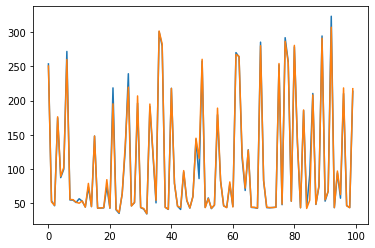

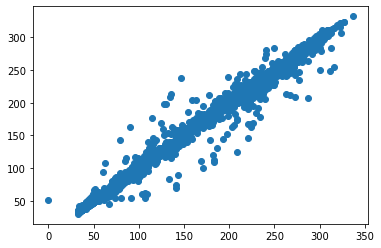

In [111]:
# Plot graphs
plt.plot(y_test[1000:1100])
plt.plot(y_pred_composite[1000:1100])
plt.show()
plt.scatter(y_test, y_pred_composite)

In [112]:
# Calculate errors
# score = metrics.accuracy_score(y_test ,y_pred_RF)
# Evaluate errors
MAE_composite=metrics.mean_absolute_error(y_test,y_pred_composite) 
MSE_composite=metrics.mean_squared_error(y_test,y_pred_composite)  
RMSE_composite= np.sqrt(metrics.mean_squared_error(y_test,y_pred_composite))
print(MAE_composite,MSE_composite,RMSE_composite)

3.1354149833416254 64.16149481264219 8.010087066483248


## Alternative Approach: Separate Models for Weekdays and Weekend

In [113]:
weekday_values = nt_FES_alt[nt_FES_alt['Weekend']==0].values
weekend_values = nt_FES_alt[nt_FES_alt['Weekend']==1].values

#values = nt_FES.values
y_weekday = weekday_values[:, 3]
x_weekday = weekday_values[:, 4:12]
y_weekend = weekend_values[:, 3]
x_weekend = weekend_values[:, 4:12]

#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

x_weekday_train, x_weekday_test, y_weekday_train, y_weekday_test = train_test_split(x_weekday, y_weekday)
x_weekend_train, x_weekend_test, y_weekend_train, y_weekend_test = train_test_split(x_weekend, y_weekend)

#x_train =  nt_FES_enhanced_cat.loc[nt_FES_enhanced_cat['Date_start'].dt.year == 2017, nt_FES_enhanced_cat.columns[4:]].values
#y_train = nt_FES_enhanced_cat.loc[nt_FES_enhanced_cat['Date_start'].dt.year == 2017, 'Power_kW'].values
#x_test =  nt_FES_enhanced_cat.loc[nt_FES_enhanced_cat['Date_start'].dt.year == 2018, nt_FES_enhanced_cat.columns[4:]].values
#y_test = nt_FES_enhanced_cat.loc[nt_FES_enhanced_cat['Date_start'].dt.year == 2018, 'Power_kW'].values
print(x_weekday_train)
print(y_weekday_train)

[[4 4 41.142894500000004 ... 0 6.2298333333333344 0.85175]
 [20 3 248.52823650000002 ... 0 33.64833333333333 29.817249999999998]
 [21 2 70.440467 ... 0 19.669166666666666 5.643166666666667]
 ...
 [15 3 283.8256005 ... 0 22.161666666666665 884.3333333333334]
 [13 0 229.8976169069161 ... 1 16.160833333333333 425.2833333333333]
 [3 4 43.7771305 ... 1 11.3125 2.000916666666667]]
[41.339107500000004 106.3017795 45.409544 ... 283.744974 231.8451825647048
 44.3504745]


In [114]:
lm = linear_model.LinearRegression()

lm.fit(x_weekday_train, y_weekday_train)
y_pred_weekday_LR = lm.predict(x_weekday_test)

lm.fit(x_weekend_train, y_weekend_train)
y_pred_weekend_LR = lm.predict(x_weekend_test)

In [115]:
y_test = np.concatenate((y_weekday_test, y_weekend_test))
y_pred_LR = np.concatenate((y_pred_weekday_LR, y_pred_weekend_LR))

In [116]:
# Build the model
parameters = {'bootstrap': True,
              'min_samples_leaf': 4,
              'n_estimators': 200, 
              'min_samples_split': 13,
              'max_features': 'sqrt',
              'max_depth': 15,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_weekday_train, y_weekday_train)
y_pred_weekday_RF = RF_model.predict(x_weekday_test)

RF_model.fit(x_weekend_train, y_weekend_train)
y_pred_weekend_RF = RF_model.predict(x_weekend_test)

y_pred_RF = np.concatenate((y_pred_weekday_RF, y_pred_weekend_RF))

In [117]:
# Build the model
parameters = {'n_estimators' : 200,
             'min_samples_split' : 10,
             'min_samples_leaf' : 3,
             'max_depth' : 15}

GBR_model = GradientBoostingRegressor(**parameters)
GBR_model.fit(x_weekday_train, y_weekday_train)
y_pred_weekday_GBR = GBR_model.predict(x_weekday_test)

GBR_model.fit(x_weekend_train, y_weekend_train)
y_pred_weekend_GBR = GBR_model.predict(x_weekend_test)

y_pred_GBR = np.concatenate((y_pred_weekday_GBR, y_pred_weekend_GBR))

In [118]:
# ANN is sensitive to feature scaling
scaler = StandardScaler()
scaler.fit(x_weekday_train)
x_weekday_train_ANN = scaler.transform(x_weekday_train)
x_weekday_test_ANN = scaler.transform(x_weekday_test)
scaler.fit(x_weekend_train)
x_weekend_train_ANN = scaler.transform(x_weekend_train)
x_weekend_test_ANN = scaler.transform(x_weekend_test)
#activation_list = ['identity', 'logistic', 'tanh', 'relu']
#ANN_results = {}

#for activation in activation_list:
parameters = {'hidden_layer_sizes':(100,20),
              'max_iter':2000,
              'early_stopping':True,
              'validation_fraction':0.2,
              'alpha':0.00001,
              'learning_rate_init':0.1}

ANN_model = MLPRegressor(**parameters)
ANN_model.fit(x_weekday_train_ANN, y_weekday_train)
y_pred_weekday_ANN = ANN_model.predict(x_weekday_test_ANN)

ANN_model.fit(x_weekend_train_ANN, y_weekend_train)
y_pred_weekend_ANN = ANN_model.predict(x_weekend_test_ANN)

y_pred_ANN = np.concatenate((y_pred_weekday_ANN, y_pred_weekend_ANN))
#MAE_ANN=metrics.mean_absolute_error(y_test,y_pred_ANN)
#ANN_results[activation] = MAE_ANN
#print(ANN_results)

In [119]:
LR_abs_error = np.reshape(abs(y_test-y_pred_LR), (-1,1))
RF_abs_error = np.reshape(abs(y_test-y_pred_RF), (-1,1))
GBR_abs_error = np.reshape(abs(y_test-y_pred_GBR), (-1,1))
ANN_abs_error = np.reshape(abs(y_test-y_pred_ANN), (-1,1))

abs_error_df = pd.DataFrame(np.concatenate((LR_abs_error, RF_abs_error, GBR_abs_error, ANN_abs_error),
                                           axis=1), columns=['LR', 'RF', 'GBR', 'ANN'])
abs_error_df.head()

,LR,RF,GBR,ANN
0,37.6269,7.88555,4.27687,15.6847
1,14.6158,1.29356,2.43528,8.39656
2,15.4148,3.51977,0.647112,3.1257
3,27.6731,21.727,44.4866,6.92357
4,12.7709,0.934546,0.391363,2.85247


In [120]:
abs_error_df['Composite'] = abs_error_df.min(axis=1)
abs_error_df.head()

,LR,RF,GBR,ANN,Composite
0,37.6269,7.88555,4.27687,15.6847,4.276869
1,14.6158,1.29356,2.43528,8.39656,1.293555
2,15.4148,3.51977,0.647112,3.1257,0.647112
3,27.6731,21.727,44.4866,6.92357,6.923567
4,12.7709,0.934546,0.391363,2.85247,0.391363


In [121]:
abs_error_df['Choice_RF'] = False
abs_error_df['Choice_GBR'] = False
abs_error_df['Choice_ANN'] = False

abs_error_df.loc[abs_error_df['RF'] == abs_error_df['Composite'], 'Choice_RF'] = True
abs_error_df.loc[abs_error_df['GBR'] == abs_error_df['Composite'], 'Choice_GBR'] = True
abs_error_df.loc[abs_error_df['ANN'] == abs_error_df['Composite'], 'Choice_ANN'] = True

In [122]:
y_pred_composite = y_pred_LR.copy()

In [123]:
RF_mask = np.where(abs_error_df['Choice_RF'])
GBR_mask = np.where(abs_error_df['Choice_GBR'])
ANN_mask = np.where(abs_error_df['Choice_ANN'])

y_pred_composite[RF_mask] = y_pred_RF[RF_mask]
y_pred_composite[GBR_mask] = y_pred_GBR[GBR_mask]
y_pred_composite[ANN_mask] = y_pred_ANN[ANN_mask]
y_pred_composite

array([251.18371685, 197.74115384,  77.57178483, ...,  43.95404483,
        42.14933087,  43.17346107])

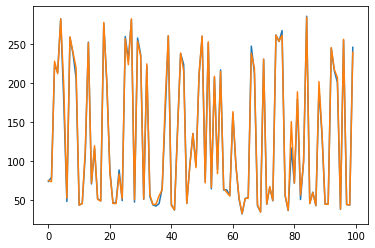

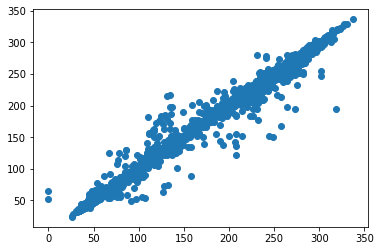

In [124]:
# Plot graphs
plt.plot(y_test[1000:1100])
plt.plot(y_pred_composite[1000:1100])
plt.show()
plt.scatter(y_test, y_pred_composite)

In [125]:
# Calculate errors
# score = metrics.accuracy_score(y_test ,y_pred_RF)
# Evaluate errors
MAE_composite=metrics.mean_absolute_error(y_test,y_pred_composite) 
MSE_composite=metrics.mean_squared_error(y_test,y_pred_composite)  
RMSE_composite= np.sqrt(metrics.mean_squared_error(y_test,y_pred_composite))
print(MAE_composite,MSE_composite,RMSE_composite)

3.1861489643923027 72.27509600235568 8.501476107262532
